In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/startup_funding.csv")
display(df.head())
display(df.info())


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


None

In [102]:
df=df.drop('Remarks',axis=1)

In [103]:
for col in['Industry Vertical','SubVertical','City  Location','Investors Name','InvestmentnType']:
  df[col] = df[col].fillna('unknow')

In [104]:
df['Amount in USD'] = df['Amount in USD'].astype(str).str.replace(',','',regex=False).str.replace('+','',regex=False)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')
df['Amount in USD'] = df['Amount in USD'].fillna(0)

In [107]:
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%y',errors='coerce')

In [108]:
for col in['Industry Vertical','SubVertical','City  Location','Investors Name','InvestmentnType']:
  df[col] = df[col].astype(str).str.strip().str.replace('\\\\xc2\\\\xa0','',regex=True)
  df[col] = df[col].apply(lambda x:' '.join(x.split()))
  df[col] = df[col].str.lower()

In [109]:
df['Amount in USD'] = df['Amount in USD'].astype(str).str.replace(',', '', regex=False).str.replace('+', '', regex=False)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')
df['Amount in USD'] = df['Amount in USD'].fillna(0)

In [110]:
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')

In [111]:
for col in['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location','Investors Name','InvestmentnType']:
  df[col] = df[col].astype(str).str.strip().str.replace('\\\xc2\\\xa0', '', regex=True)
  df[col] = df[col].apply(lambda x: ' '.join(x.split()))
  df[col] = df[col].str.lower()



In [112]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date dd/mm/yyyy    3036 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  3044 non-null   object        
 4   SubVertical        3044 non-null   object        
 5   City  Location     3044 non-null   object        
 6   Investors Name     3044 non-null   object        
 7   InvestmentnType    3044 non-null   object        
 8   Amount in USD      3044 non-null   float64       
 9   FundingYear        3036 non-null   float64       
 10  FundingMonth       3036 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 261.7+ KB


None

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,FundingYear,FundingMonth
0,1,2020-01-09,byju’s,e-tech,e-learning,bengaluru,tiger global management,private equity round,200000000.0,2020.0,1.0
1,2,2020-01-13,shuttl,transportation,app based shuttle service,gurgaon,susquehanna growth equity,series c,8048394.0,2020.0,1.0
2,3,2020-01-09,mamaearth,e-commerce,retailer of baby and toddler products,bengaluru,sequoia capital india,series b,18358860.0,2020.0,1.0
3,4,2020-01-02,https://www.wealthbucket.in/,fintech,online investment,new delhi,vinod khatumal,pre-series a,3000000.0,2020.0,1.0
4,5,2020-01-02,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed round,1800000.0,2020.0,1.0


###substack

##Analyze funding trends over time

In [113]:
df['FundingYear'] = df['Date dd/mm/yyyy'].dt.year
df['FundingMonth'] = df['Date dd/mm/yyyy'].dt.month


yearly_funding_trends = df.groupby('FundingYear').agg(
    total_funding_usd=('Amount in USD', 'sum'),
    number_of_deals=('Sr No', 'count')
).reset_index()

display(yearly_funding_trends)

,FundingYear,total_funding_usd,number_of_deals
0,2015.0,8.597207e+09,929
1,2016.0,3.828089e+09,993
2,2017.0,1.042931e+10,687
3,2018.0,5.116118e+09,309
4,2019.0,9.700919e+09,111
5,2020.0,3.902073e+08,7


In [114]:
monthly_funding_trends = df.groupby('FundingMonth').agg(
    total_funding_usd=('Amount in USD', 'sum'),
    number_of_deals=('Sr No', 'count')
).reset_index()

display(monthly_funding_trends)

,FundingMonth,total_funding_usd,number_of_deals
0,1.0,2.197017e+09,274
1,2.0,2.458552e+09,248
2,3.0,3.329123e+09,251
3,4.0,2.295048e+09,261
4,5.0,2.965550e+09,238
5,6.0,1.770109e+09,296
6,7.0,2.784216e+09,251
7,8.0,9.687169e+09,272
8,9.0,3.352273e+09,241
9,10.0,1.575676e+09,236


In [115]:

sector_funding = df.groupby('Industry Vertical')['Amount in USD'].sum().reset_index()
sector_funding = sector_funding.sort_values(by='Amount in USD', ascending=False)
print("Top 10 Sectors by Funding:")
display(sector_funding.head(10))



Top 10 Sectors by Funding:


,Industry Vertical,Amount in USD
187,ecommerce,7.163711e+09
122,consumer internet,6.254084e+09
753,transportation,3.916632e+09
749,technology,2.229708e+09
248,finance,1.971438e+09
765,unknow,1.231811e+09
256,fintech,1.224211e+09
180,e-commerce,1.097025e+09
559,online marketplace,7.001430e+08
181,e-commerce & m-commerce platform,6.800000e+08


In [116]:
# Group by City Location and sum the funding amount
city_funding = df.groupby('City  Location')['Amount in USD'].sum().reset_index()
city_funding = city_funding.sort_values(by='Amount in USD', ascending=False)
print("\nTop 10 Cities by Funding:")
display(city_funding.head(10))


Top 10 Cities by Funding:


,City Location,Amount in USD
11,bangalore,1.136159e+10
18,bengaluru,7.112921e+09
66,mumbai,4.921185e+09
73,new delhi,3.017817e+09
38,gurgaon,3.005296e+09
105,unknow,1.271864e+09
80,noida,1.262864e+09
40,gurugram,8.659325e+08
28,chennai,7.187670e+08
85,pune,6.330820e+08


In [118]:
# Group by Industry Vertical and sum the funding amount
sector_funding = df.groupby('Industry Vertical')['Amount in USD'].sum().reset_index()
sector_funding = sector_funding.sort_values(by='Amount in USD', ascending=False)
print("Top 10 Sectors by Funding:")
display(sector_funding.head(10))



Top 10 Sectors by Funding:


,Industry Vertical,Amount in USD
187,ecommerce,7.163711e+09
122,consumer internet,6.254084e+09
753,transportation,3.916632e+09
749,technology,2.229708e+09
248,finance,1.971438e+09
765,unknow,1.231811e+09
256,fintech,1.224211e+09
180,e-commerce,1.097025e+09
559,online marketplace,7.001430e+08
181,e-commerce & m-commerce platform,6.800000e+08


In [119]:
# Group by City Location and sum the funding amount
city_funding = df.groupby('City  Location')['Amount in USD'].sum().reset_index()
# Ensure 'Amount in USD' is numeric before sorting
city_funding['Amount in USD'] = pd.to_numeric(city_funding['Amount in USD'], errors='coerce').fillna(0)
city_funding = city_funding.sort_values(by='Amount in USD', ascending=False)
print("\nTop 10 Cities by Funding:")
display(city_funding.head(10))


Top 10 Cities by Funding:


,City Location,Amount in USD
11,bangalore,1.136159e+10
18,bengaluru,7.112921e+09
66,mumbai,4.921185e+09
73,new delhi,3.017817e+09
38,gurgaon,3.005296e+09
105,unknow,1.271864e+09
80,noida,1.262864e+09
40,gurugram,8.659325e+08
28,chennai,7.187670e+08
85,pune,6.330820e+08


In [71]:
# Group by Startup Name and sum the funding amount
startup_funding = df.groupby('Startup Name')['Amount in USD'].sum().reset_index()
startup_funding = startup_funding.sort_values(by='Amount in USD', ascending=False)
print("\nTop 10 Startups by Funding:")
display(startup_funding.head(10))


Top 10 Startups by Funding:


,Startup Name,Amount in USD
688,flipkart,4.059700e+09
1668,rapido bike taxi,3.900000e+09
1532,paytm,3.148950e+09
1473,ola,9.845000e+08
2112,udaan,8.700000e+08
1875,snapdeal,7.000000e+08
689,flipkart.com,7.000000e+08
1474,ola cabs,6.697000e+08
1509,oyo rooms,6.350000e+08
2090,true north,6.000000e+08


###substack


In [121]:
# Ensure 'Amount in USD' is numeric before grouping
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce').fillna(0)

investor_activity = df.groupby('Investors Name').agg(
    total_funding_usd=('Amount in USD', 'sum'),
    number_of_deals=('Sr No', 'count')
).reset_index()



In [122]:
top_investors_by_funding = investor_activity.sort_values(by='total_funding_usd', ascending=False)
print("Top 10 Investors by Total Funding")
display(top_investors_by_funding.head(10))

Top 10 Investors by Total Funding


,Investors Name,total_funding_usd,number_of_deals
2328,westbridge capital,3.952000e+09,2
1948,softbank,2.500000e+09,1
1950,softbank group,1.467000e+09,3
1303,"microsoft, ebay, tencent holdings",1.400000e+09,1
2284,vijay shekhar sharma,1.000150e+09,4
2001,steadview capital and existing investors,7.000000e+08,1
142,"alibaba group, ant financial",6.800000e+08,1
2214,unknow,6.241060e+08,24
1956,softbank vision fund,6.010000e+08,3
158,"altimeter capital, dst global",5.850000e+08,1


In [124]:
investment_type_summary = df.groupby('InvestmentnType').agg(
    total_funding_usd=('Amount in USD', 'sum'),
    number_of_deals=('Sr No', 'count')
).reset_index()

investment_type_summary_by_funding = investment_type_summary.sort_values(by='total_funding_usd', ascending=False)
print("Investment Types by Total Funding:")
display(investment_type_summary_by_funding)

investment_type_summary_by_deals = investment_type_summary.sort_values(by='number_of_deals', ascending=False)
print("\nInvestment Types by Number of Deals:")
display(investment_type_summary_by_deals)

Investment Types by Total Funding:


,InvestmentnType,total_funding_usd,number_of_deals
20,private equity,2.664232e+10,1356
35,series b,4.799196e+09,20
38,series d,1.481799e+09,12
37,series c,1.044718e+09,14
13,funding round,1.000000e+09,1
28,seed funding,5.686283e+08,1356
21,private equity round,5.060000e+08,4
41,series g,2.310000e+08,1
47,unknow,2.076290e+08,4
34,series a,2.032000e+08,24



Investment Types by Number of Deals:


,InvestmentnType,total_funding_usd,number_of_deals
20,private equity,2.664232e+10,1356
28,seed funding,5.686283e+08,1356
31,seed/ angel funding,7.882681e+07,60
26,seed / angel funding,3.569317e+07,47
33,seed\\nfunding,1.000760e+07,30
9,debt funding,1.509204e+08,25
34,series a,2.032000e+08,24
32,seed/angel funding,9.530230e+06,23
35,series b,4.799196e+09,20
37,series c,1.044718e+09,14


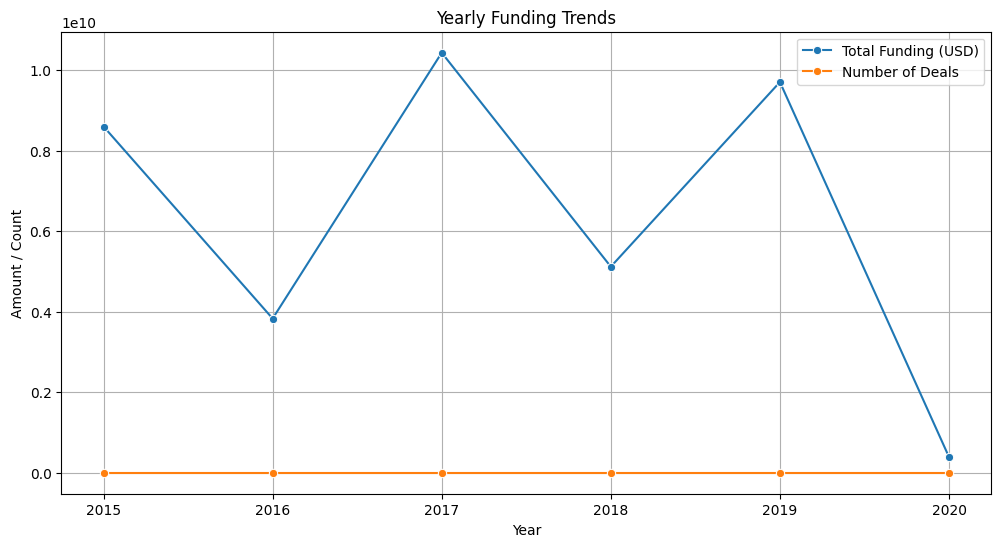

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1: Yearly Funding Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_funding_trends, x='FundingYear', y='total_funding_usd', marker='o', label='Total Funding (USD)')
sns.lineplot(data=yearly_funding_trends, x='FundingYear', y='number_of_deals', marker='o', label='Number of Deals')
plt.title('Yearly Funding Trends')
plt.xlabel('Year')
plt.ylabel('Amount / Count')
plt.xticks(yearly_funding_trends['FundingYear'])
plt.grid(True)
plt.legend()
plt.show()

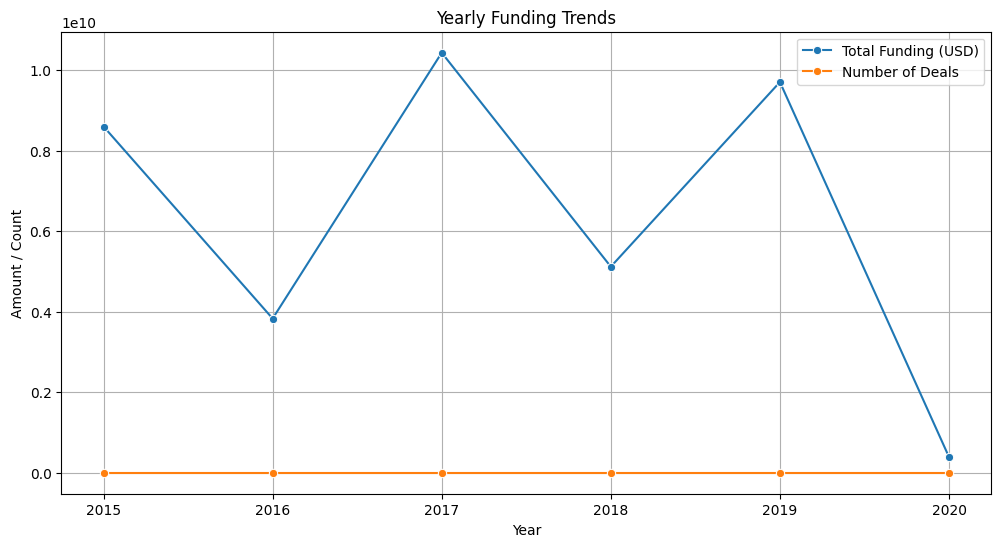

/tmp/ipython-input-1244337281.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_funding.head(10), x='Industry Vertical', y='Amount in USD', palette='viridis', legend=False)


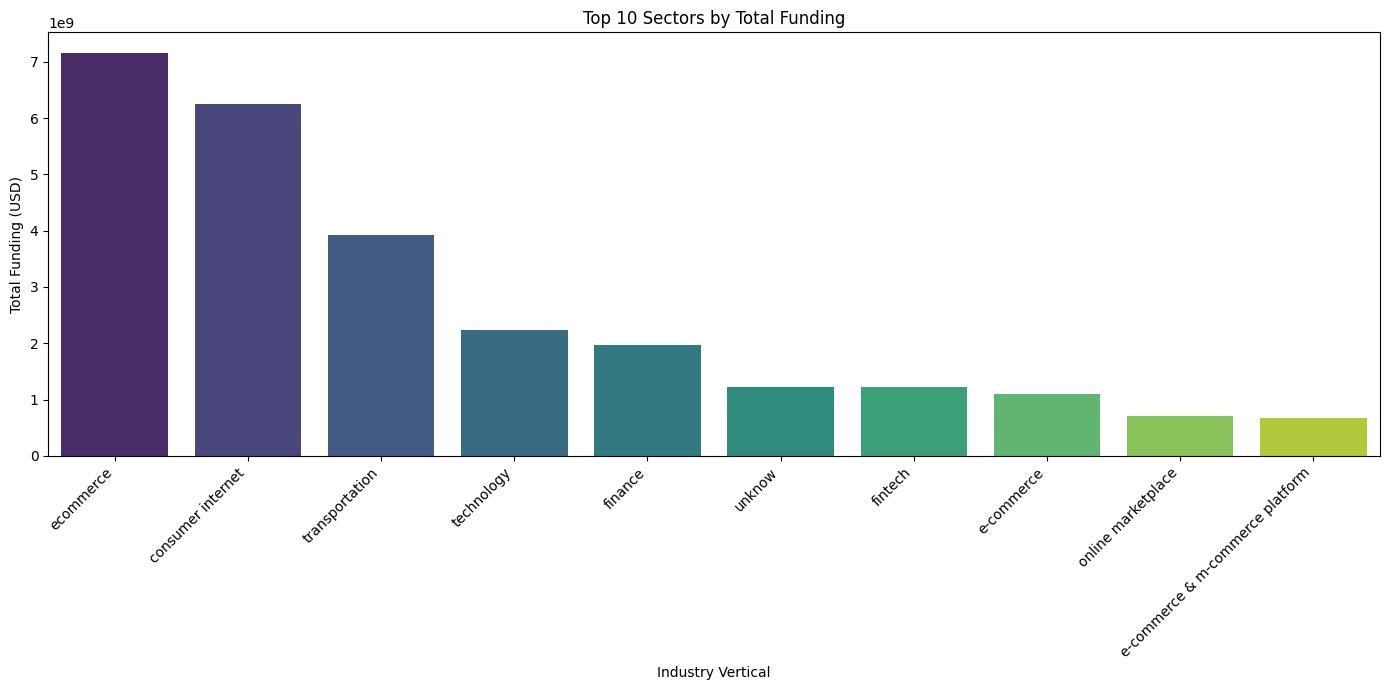

/tmp/ipython-input-1244337281.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_funding.head(10), x='City  Location', y='Amount in USD', palette='viridis', legend=False)


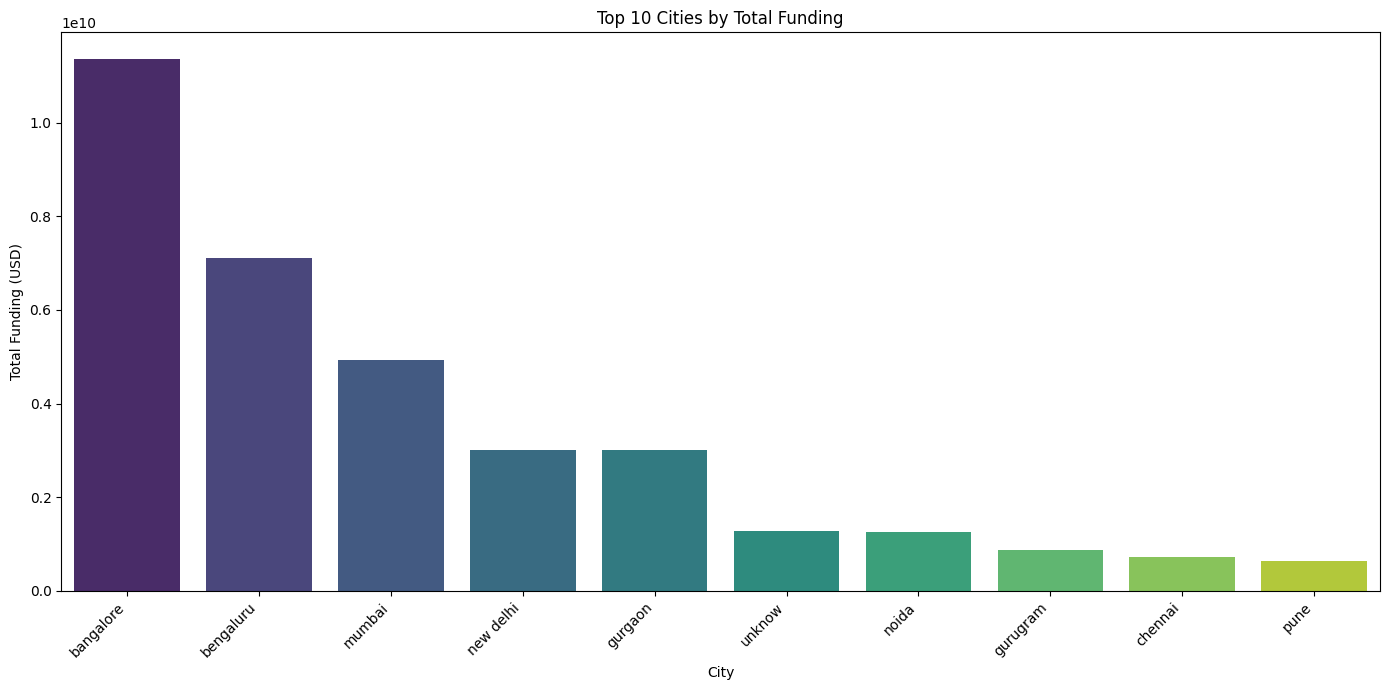

In [127]:
# 1. Yearly Funding Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_funding_trends, x='FundingYear', y='total_funding_usd', marker='o', label='Total Funding (USD)')
sns.lineplot(data=yearly_funding_trends, x='FundingYear', y='number_of_deals', marker='o', label='Number of Deals')
plt.title('Yearly Funding Trends')
plt.xlabel('Year')
plt.ylabel('Amount / Count')
plt.xticks(yearly_funding_trends['FundingYear'])
plt.grid(True)
plt.legend()
plt.show()

# 2. Top 10 Sectors by Funding
plt.figure(figsize=(14, 7))
sns.barplot(data=sector_funding.head(10), x='Industry Vertical', y='Amount in USD', palette='viridis', legend=False)
plt.title('Top 10 Sectors by Total Funding')
plt.xlabel('Industry Vertical')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Top 10 Cities by Funding
plt.figure(figsize=(14, 7))
sns.barplot(data=city_funding.head(10), x='City  Location', y='Amount in USD', palette='viridis', legend=False)
plt.title('Top 10 Cities by Total Funding')
plt.xlabel('City')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()